In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('employee_query.csv', index_col=None)

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data = data.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'project',
                        'average_montly_hours': 'monthlyHours',
                        'time_spend_company': 'years',
                        'Work_accident': 'accident',
                        'left' : 'turnover',
                        'promotion_last_5years':'promotion',
                        'sales' : 'department',                        
                        })

In [5]:
turn = data['turnover']
data.drop(labels=['turnover'], axis=1,inplace = True)
data.insert(0, 'turnover', turn)
data.head()

,turnover,satisfaction,evaluation,project,monthlyHours,years,accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [6]:
data.dtypes

turnover          int64
satisfaction    float64
evaluation      float64
project           int64
monthlyHours      int64
years             int64
accident          int64
promotion         int64
department       object
salary           object
dtype: object

# Exploratory data analysis

收集回來的員工意見問卷總共有15000份<br>
<br>
satisfaction&nbsp; - &nbsp;  員工滿意度<br>
evaluation &nbsp;  - &nbsp;  公司對員工的評分<br>
project&nbsp; - &nbsp;  員工在任內接參與的項目<br>
monthlyHours&nbsp; - &nbsp;  員工每個月在公司上班的時數<br>
years    &nbsp;    -&nbsp;   員工在公司的任期<br>
accident &nbsp;    -  &nbsp; 員工曾否在任內發生意外<br>
turnover  &nbsp;   -  &nbsp; 員工是否離職<br>
promotion &nbsp;   -&nbsp;   在近期5年員工是否有進升<br>
department&nbsp;   - &nbsp;  員工所在的部門<br>
salary   &nbsp;    -&nbsp;   員工的薪金(已low,medium,high表示)

# 先看看員工的離職比例

In [7]:
turnover_rate = data.turnover.value_counts() / len(data)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

總共有76%的員工還在職
24%的員工已經離職

In [8]:
turnover_Summary = data.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,project,monthlyHours,years,accident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Correlation Matrix & Heatmap

Correlation Matrix & Heatmap<br>
可以快速查看員工離職的是否和其他的參數有關

,turnover,satisfaction,evaluation,project,monthlyHours,years,accident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
project,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
monthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
years,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


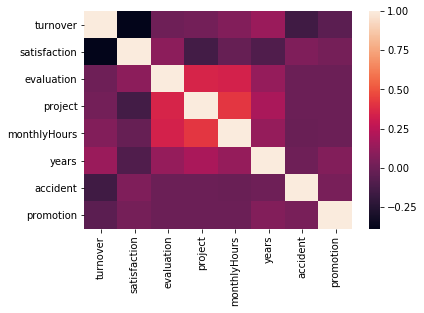

In [9]:
corr = data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

# Salary V.S. Turnover

 薪金和的員工的離職是否有關?<p>
 
 從下圖可以看出低薪酬的員工有較高的離職意向

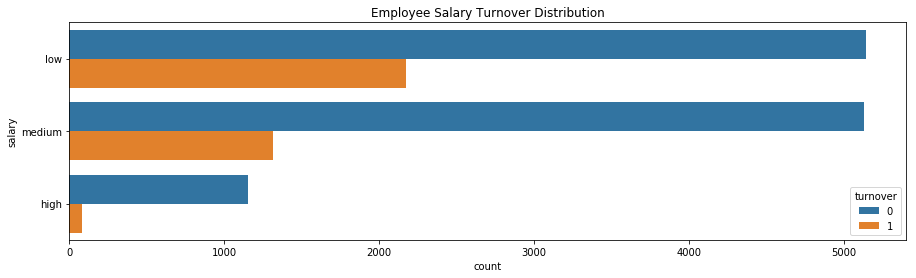

In [10]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=data).set_title('Employee Salary Turnover Distribution');

# Department V.S. Turnover

部門分佈

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

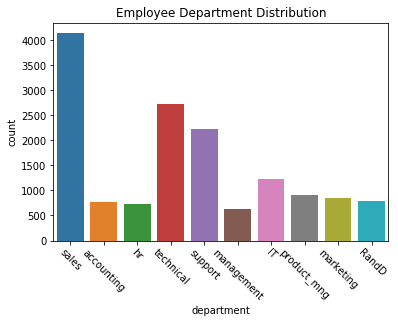

In [11]:
sns.countplot(x='department', data=data).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

不同部門的離職統計<p>

我們發現在銷售部門的員工有較高的離職

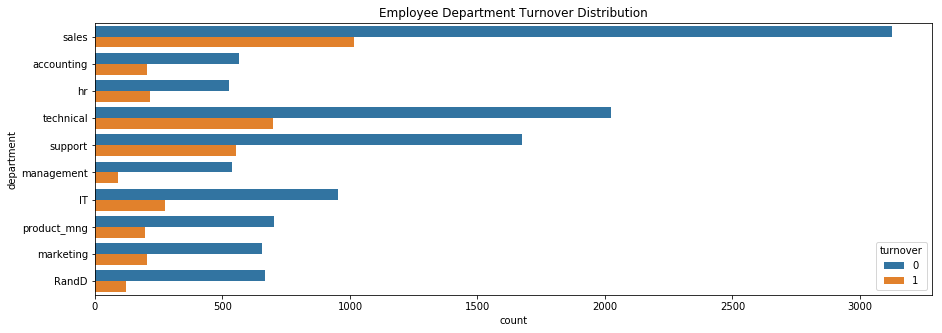

In [12]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=data).set_title('Employee Department Turnover Distribution');

# Project Count V.S. Turnover

員工參與項目較少,也會有較高的離職率<p>
但是要留意的時,參與率較高的也有離職的意向(2,6,7)

[Text(0,0.5,'Percent')]

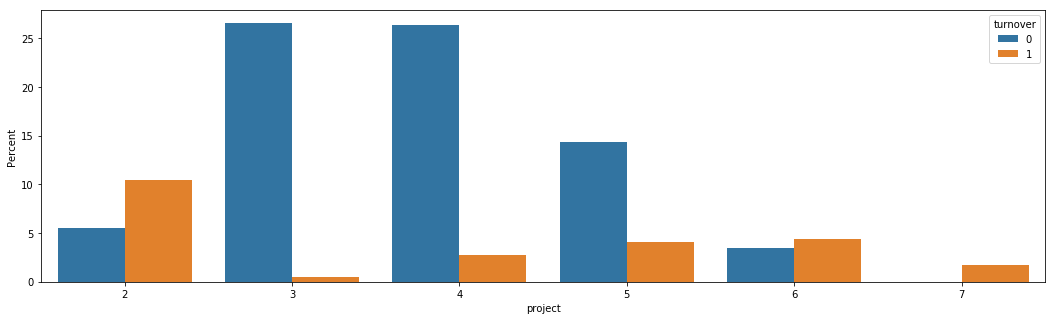

In [13]:
fig = plt.figure(figsize=(18,5))
ax = sns.barplot(x="project", y="project", hue="turnover", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")

# Evaluation V.S. Turnover

公司評分對於員工會有影響?<p>

公司給予員工較低的評分,令員工離職<br>
但同時給予較高的評分,也有不少的員工離職<br>
給予0.6-0.8評分的員工離職率是最低

Text(0.5,1,'Employee Evaluation Distribution - Turnover V.S. No Turnover')

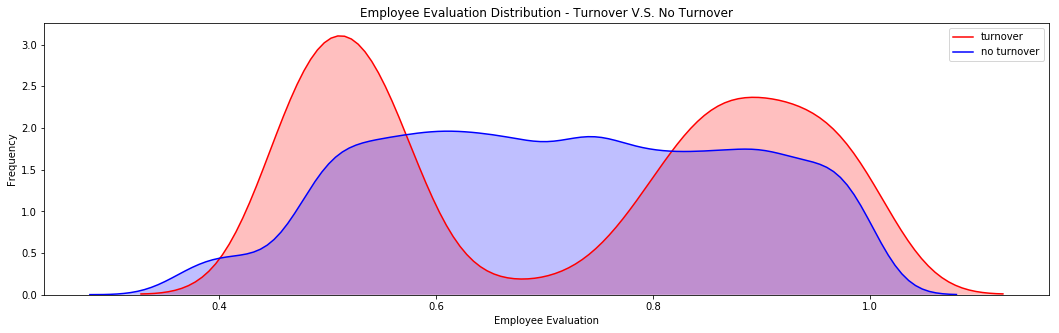

In [14]:
fig = plt.figure(figsize=(18,5),)
ax=sns.kdeplot(data.loc[(data['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax=sns.kdeplot(data.loc[(data['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

# Monthly Hours V.S.Turnover

上班時數的影響<p>
    
上班時數超過250小時和上班時數少於150小時會有較高的離職率

Text(0.5,1,'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

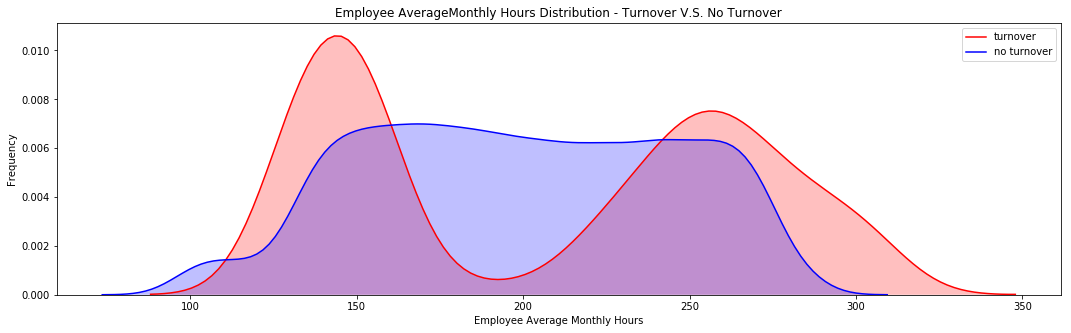

In [15]:
fig = plt.figure(figsize=(18,5))
ax=sns.kdeplot(data.loc[(data['turnover'] == 1),'monthlyHours'] , color='r',shade=True, label='turnover')
ax=sns.kdeplot(data.loc[(data['turnover'] == 0),'monthlyHours'] , color='b',shade=True, label='no turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

# Satisfaction V.S. Turnover

員工的滿意度<p>
    
過底的滿意度0.1
底滿意度0.4
高滿意度0.8也會令員工離職

Text(0.5,1,'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

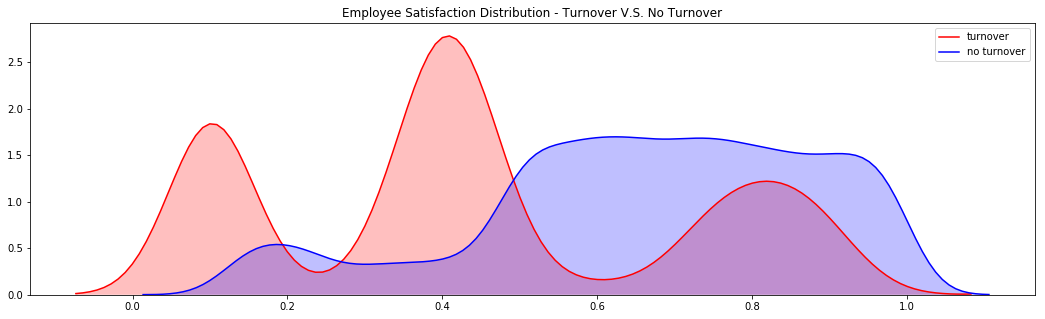

In [16]:
fig = plt.figure(figsize=(18,5))
ax=sns.kdeplot(data.loc[(data['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
ax=sns.kdeplot(data.loc[(data['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')


# Years V.S.Turnover 

年資的影響<p>

有4-5年資的員工是最多人離開,年資去到5年是一個關鍵的位置,5年過後離職的人數便會下降

[Text(0,0.5,'Percent')]

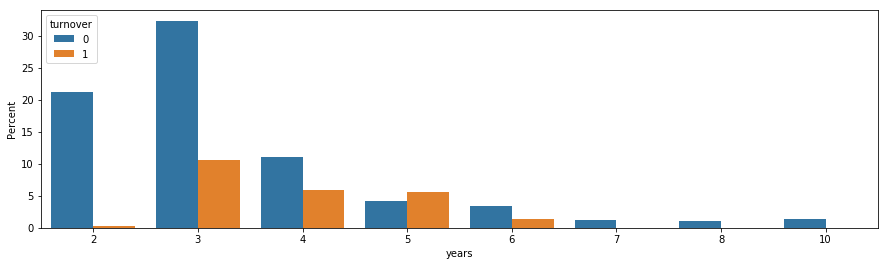

In [17]:
fig = plt.figure(figsize=(15,4))
ax = sns.barplot(x="years", y="years", hue="turnover", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")

# Machine Learning and Prediction

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [19]:
data['int'] = 1
indep_var = ['satisfaction', 'evaluation', 'years', 'int', 'turnover']
data = data[indep_var]

In [20]:
data.head()

,satisfaction,evaluation,years,int,turnover
0,0.38,0.53,3,1,1
1,0.80,0.86,6,1,1
2,0.11,0.88,4,1,1
3,0.72,0.87,5,1,1
4,0.37,0.52,3,1,1


In [21]:
target_name = 'turnover'
X = data.drop('turnover', axis=1)

In [22]:
y=data[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=456, stratify=y)

X_train.head()

,satisfaction,evaluation,years,int
2626,0.89,0.71,3,1
11056,0.15,0.91,3,1
8503,0.76,1.00,2,1
621,0.10,0.86,4,1
8347,0.97,0.60,5,1


In [23]:
import statsmodels.api as sm
iv = ['satisfaction','evaluation','years', 'int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

C:\Users\Tommy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.466878
         Iterations 6


satisfaction   -3.763481
evaluation      0.286273
years           0.169892
int             0.120671
dtype: float64

In [24]:
coef = answer.params
def y (coef, Satisfaction, Evaluation, Years) : 
    return coef[3] + coef[0]*Satisfaction + coef[1]*Evaluation + coef[2]*Years



# Prediction

透過Machine Learning,我們可以得出一條公式<br>
該公式我們可以預測員工會否離職<p>
假設有三位員分別是<br>
滿意度為50%,公司評分為70%,已入職2年<p>
滿意度為70%,公司評分為50%,已入職1年<p>
滿意度為30%,公司評分為70%,已入職5年<p>
會有多少機率離開公司?

In [25]:
y1 = y(coef, 0.5, 0.7, 2)
p1 = np.exp(y1) / (1+np.exp(y1))

y2 = y(coef, 0.7, 0.5, 1)
p2 = np.exp(y2) / (1+np.exp(y2))

y3 = y(coef, 0.3, 0.7, 5)
p3 = np.exp(y3) / (1+np.exp(y3))

print(p1)
print(p2)
print(p3)

0.227779279954
0.0996843553462
0.510368580391


員工A有22%機會離開公司<br>
員工B有10%機會離開公司<br>
員工C有51%機會離開公司<br>